In [123]:
%pip install xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 3.5 MB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

obesity_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
obesity_df['BMI'] = obesity_df['Weight'] / (obesity_df['Height'] ** 2)

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_features = ['Gender', 'family_history_with_overweight', 'CAEC', 'CALC', 'SCC', 'MTRANS', 'SMOKE', 'NObeyesdad', 'FAVC']
for feature in categorical_features:
    obesity_df[feature] = label_encoder.fit_transform(obesity_df[feature])
    if feature == 'NObeyesdad':
        outcome_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(obesity_df.head())
print(outcome_mapping)

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad        BMI  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  24.386526  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  24.238227  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  23.765432  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  26.851852  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  28.342381  
{'Insufficient_Weight': 0, 'Normal_Weight': 1

In [13]:
y=obesity_df['NObeyesdad']
obesity_df.drop(columns=["NObeyesdad"], inplace=True)
print(obesity_df.head())
print(y.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS        BMI  
0  3.0     2      0   2.0    0  0.0  1.0     3       3  24.386526  
1  3.0     2      1   3.0    1  3.0  0.0     2       3  24.238227  
2  3.0     2      0   2.0    0  2.0  1.0     1       3  23.765432  
3  3.0     2      0   2.0    0  2.0  0.0     1       4  26.851852  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  28.342381  
0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int64


In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the scaler
scaler = MinMaxScaler()

columns = obesity_df.columns

# Apply the scaler to the data (except the target if it's included)
obesity_df = scaler.fit_transform(obesity_df)

# Convert back to DataFrame for visualization
obesity_df = pd.DataFrame(obesity_df, columns=columns)

print(obesity_df.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0     0.0  0.148936  0.320755  0.186567                             1.0   0.0   
1     0.0  0.148936  0.132075  0.126866                             1.0   0.0   
2     1.0  0.191489  0.660377  0.283582                             1.0   0.0   
3     1.0  0.276596  0.660377  0.358209                             0.0   0.0   
4     1.0  0.170213  0.622642  0.379104                             0.0   0.0   

   FCVC       NCP      CAEC  SMOKE  CH2O  SCC       FAF  TUE      CALC  \
0   0.5  0.666667  0.666667    0.0   0.5  0.0  0.000000  0.5  1.000000   
1   1.0  0.666667  0.666667    1.0   1.0  1.0  1.000000  0.0  0.666667   
2   0.5  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.5  0.333333   
3   1.0  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.0  0.333333   
4   0.5  0.000000  0.666667    0.0   0.5  0.0  0.000000  0.0  0.666667   

   MTRANS       BMI  
0    0.75  0.301162  
1    0.75  0.297240  
2 

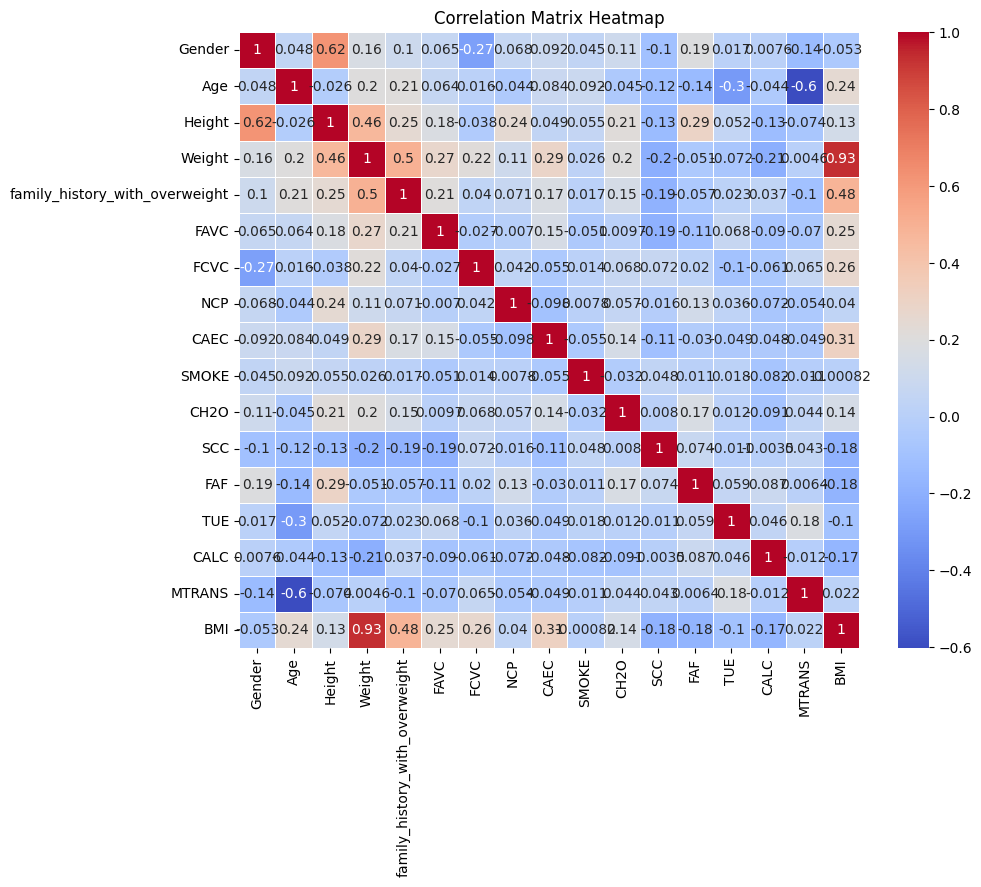

In [15]:
# Calculate the correlation matrix
corr_matrix = obesity_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

/tmp/ipykernel_3542/3663289718.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_correlation.index, y=outcome_correlation.values, palette='viridis')


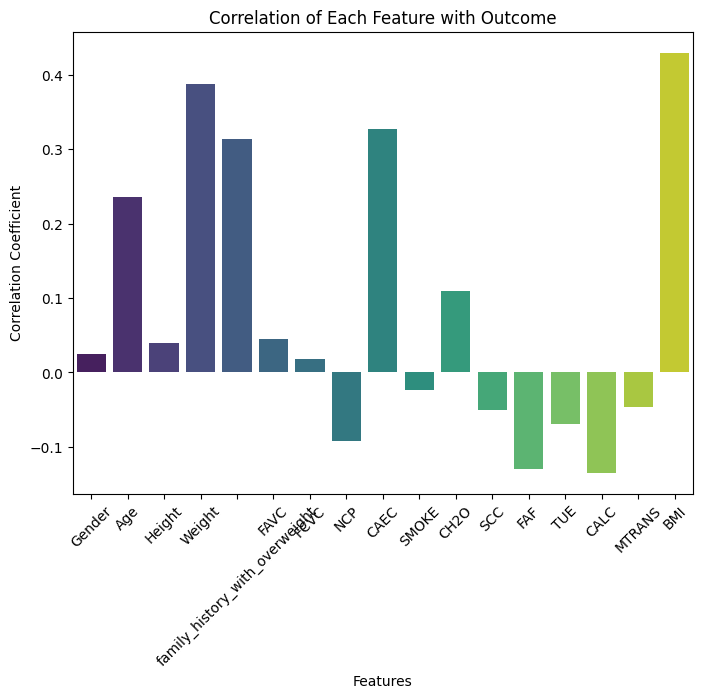

In [16]:
merged_df = pd.merge(obesity_df, y, left_index=True, right_index=True)

# Calculate the correlation matrix
corr_matrix = merged_df.corr()

outcome_correlation = corr_matrix['NObeyesdad'].drop('NObeyesdad')

# Plotting the correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_correlation.index, y=outcome_correlation.values, palette='viridis')
plt.title('Correlation of Each Feature with Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
# n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(obesity_df, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1688, 17)
Testing data shape: (423, 17)


Accuracy: 0.77
F1 Score: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


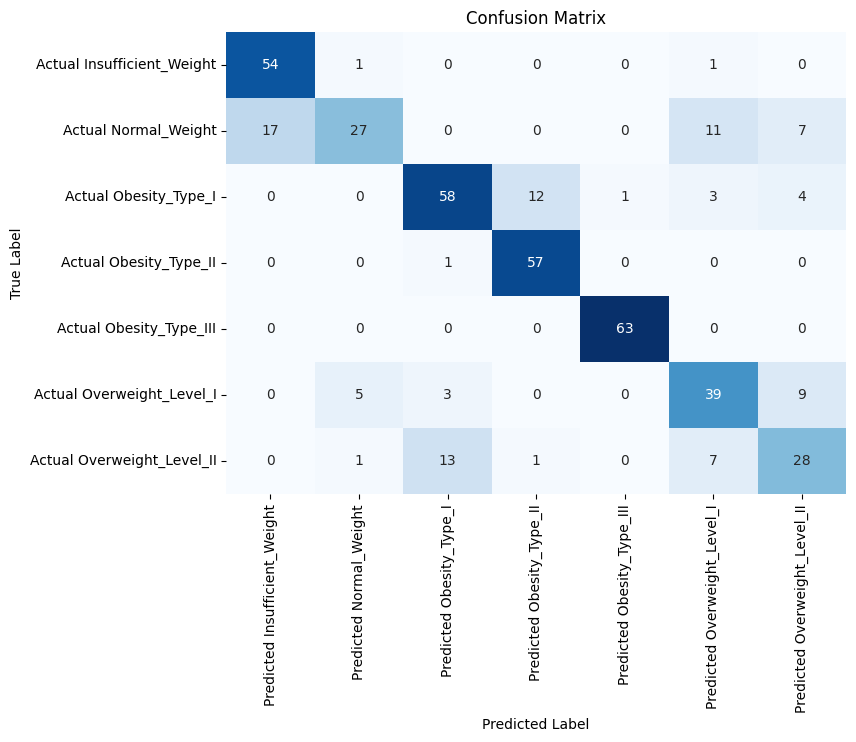

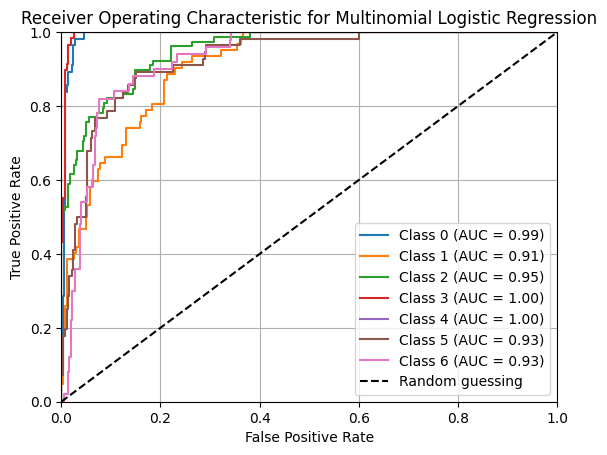

In [18]:
# Logistic Regression Training & Evaluation
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a Logistic Regression model
# logistic_model = LogisticRegression(max_iter=200)

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
# Train the model
logistic_model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_score = logistic_model.predict_proba(X_test)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in outcome_mapping.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y))

# Binarize the output labels (One-vs-Rest style for ROC curve)
y_test_bin = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_bin[:, i] = (y_test == i).astype(int)

# Loop over each class to calculate ROC curves
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Use the probabilities for the current class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate the AUC for the current class

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multinomial Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Accuracy: 0.94
F1 Score: 0.94


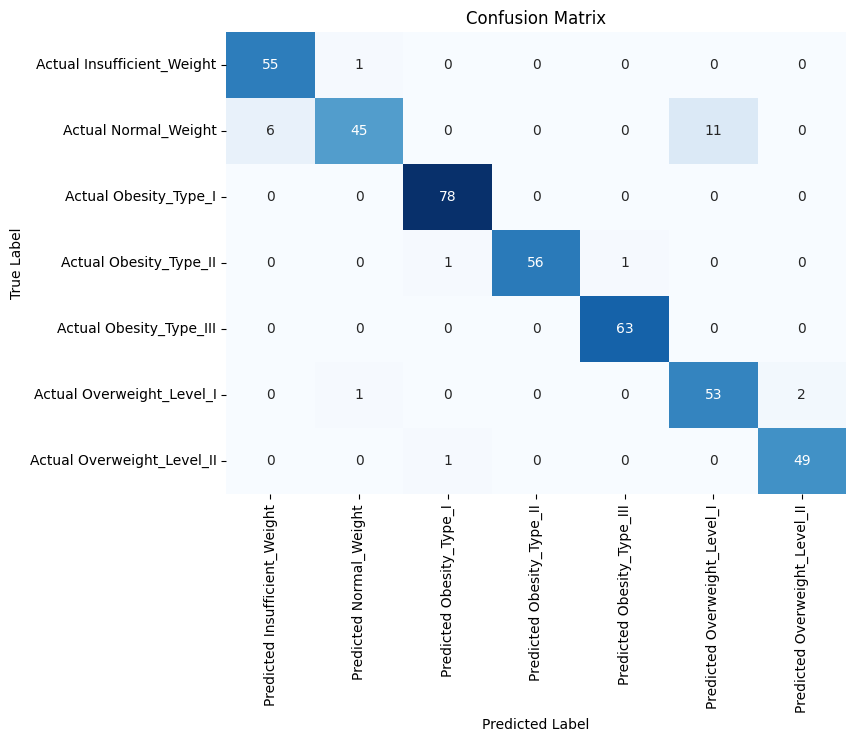

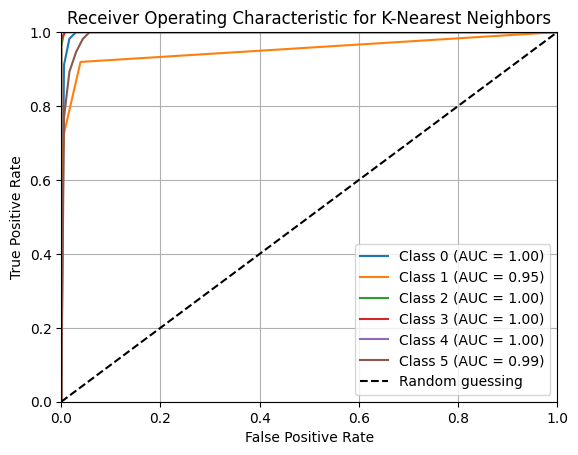

In [9]:
# Knearest Neighbour Training & Evaluation
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
# Create a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities for the test set
y_score = knn_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Binarize the output labels (One-vs-Rest style for ROC curve)
y_test_bin = np.zeros((y_test.shape[0], n_classes))
for i in range(n_classes):
    y_test_bin[:, i] = (y_test == i).astype(int)

n_classes = 6
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Use the probabilities for the current class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate the AUC for the current class

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Accuracy: 0.99
F1 Score: 0.99


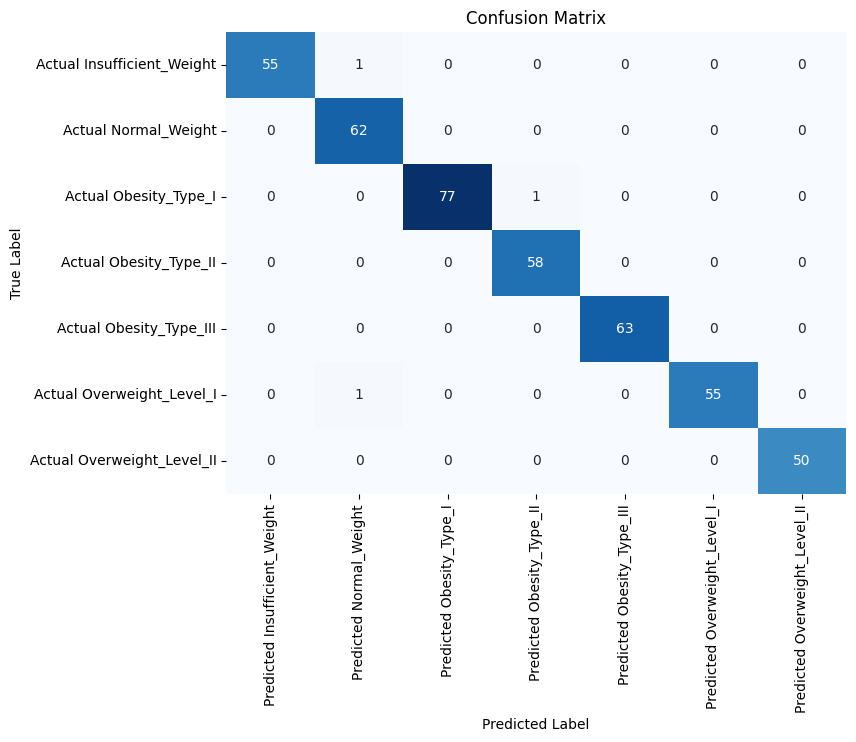

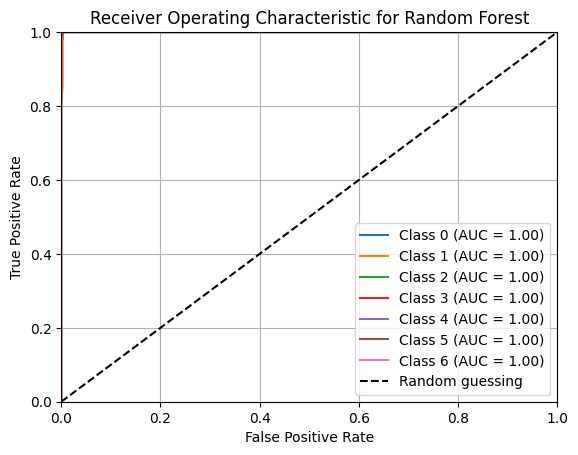

In [19]:
# Random Forest Training & Evaluation

from sklearn.ensemble import RandomForestClassifier

n_classes = len(np.unique(y_train))  # Assuming y_train has multiple classes
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

y_score = rf_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Loop over each class to calculate ROC curves
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Use probabilities for the current class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate the AUC for the current class

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:15:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.99
F1 Score: 0.99


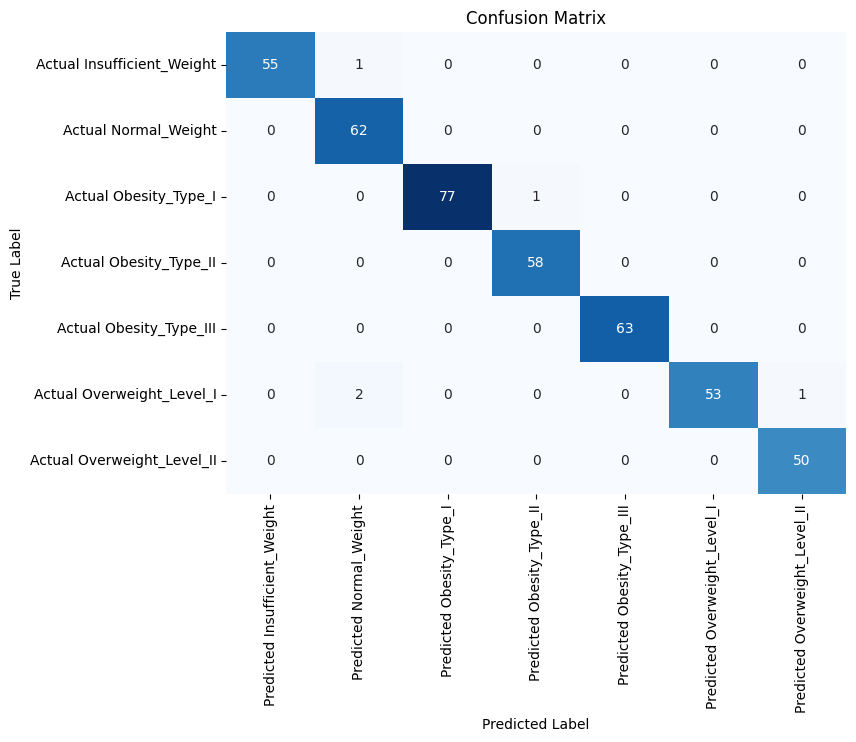

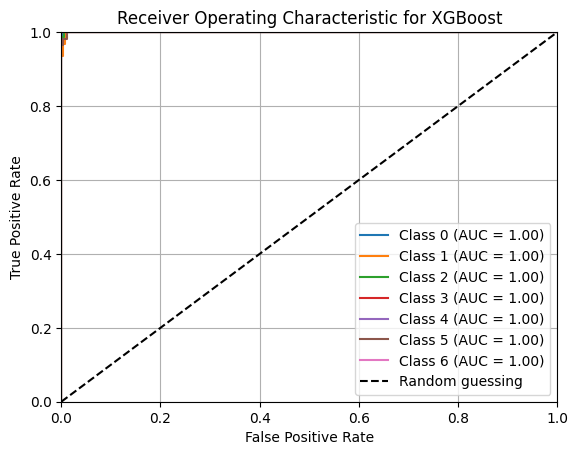

In [22]:
# XGBoost Training & Evaluation
from xgboost import XGBClassifier


n_classes = len(np.unique(y_train))  # Assuming y_train has multiple classes
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Create an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

y_score = xgb_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Loop over each class to calculate ROC curves
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Use probabilities for the current class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate the AUC for the current class

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Accuracy: 0.89
F1 Score: 0.89


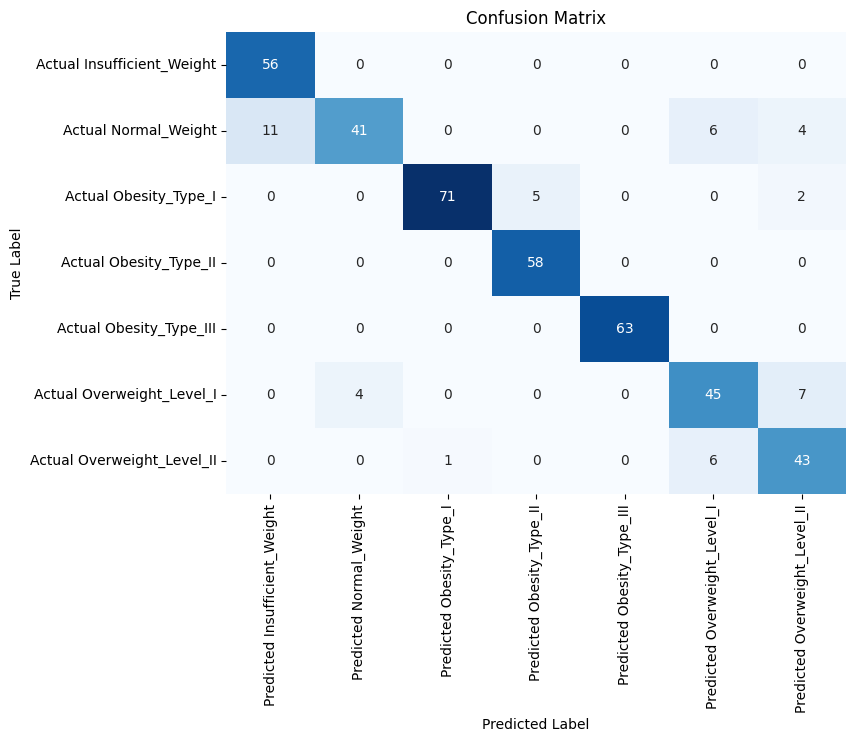

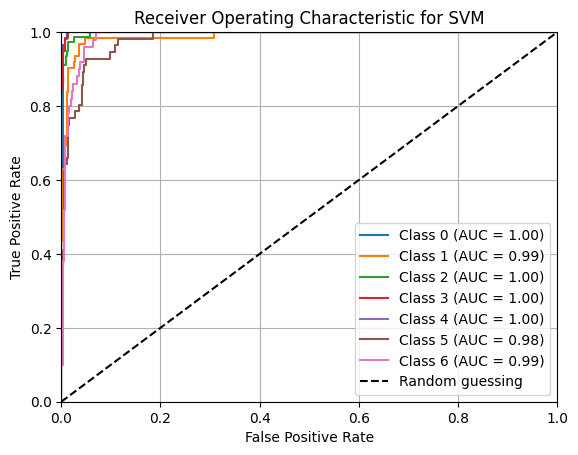

In [23]:
# SVM Training & Evaluation

from sklearn.svm import SVC


n_classes = len(np.unique(y_train))  # Assuming y_train has multiple classes
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
# Create a Support Vector Machine model
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

y_score = svm_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Loop over each class to calculate ROC curves
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Use probabilities for the current class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate the AUC for the current class

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Accuracy: 0.94
F1 Score: 0.94


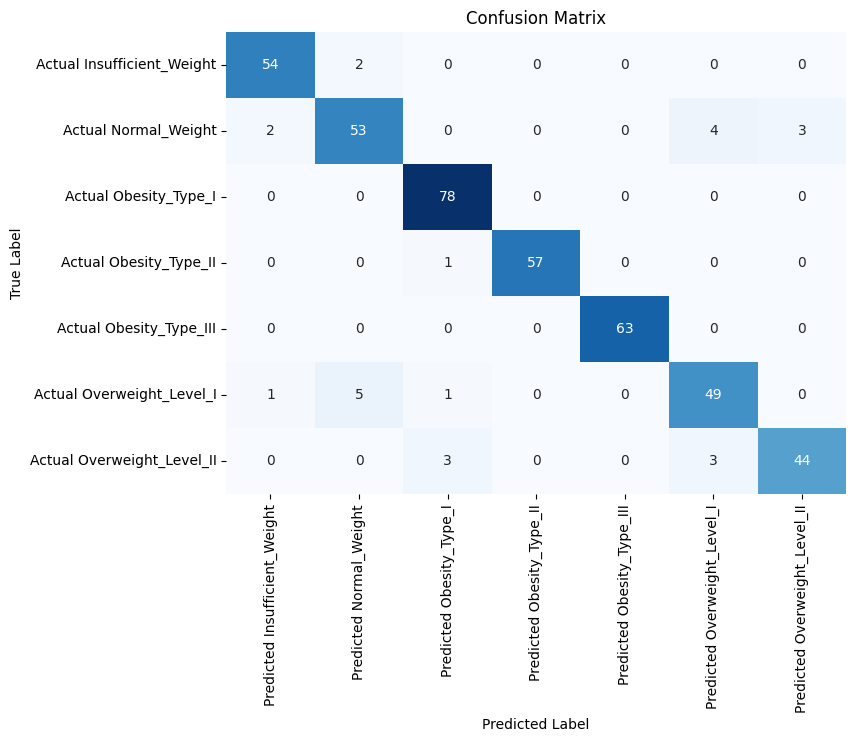

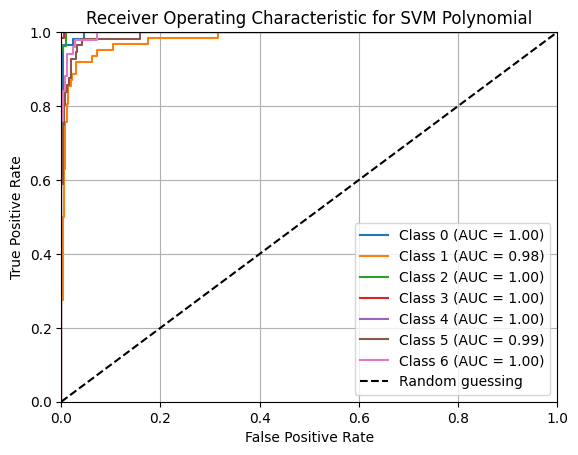

In [24]:
# SVM Training in higher dimensions & Evaluation
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

n_classes = len(np.unique(y_train))  # Assuming y_train has multiple classes
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Create a Support Vector Machine model
svm_model = SVC(decision_function_shape='ovr',kernel='poly', probability=True, degree=5, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

y_score = svm_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Loop over each class to calculate ROC curves
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Use probabilities for the current class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate the AUC for the current class

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM Polynomial')
plt.legend(loc="lower right")
plt.grid()
plt.show()